In [11]:
library(qiime2R)
library(tidyr)
library(tibble)
library(ggplot2)
library(microbiome)
library(phyloseq)
library(dplyr)
library(Maaslin2)

In [5]:
# Read in the 16S qza files and clean them up for phyloseq
table_pi <- read_qza("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/out_picrust/pi.qza")
table_pi <- table_pi$data # Extract the count data from list



In [57]:
table_pi

102tiss_S3   220tiss_S33  222tiss_S34 
1CMET2-PWY                             107623.20878 60141.4354    65005.27692
3-HYDROXYPHENYLACETATE-DEGRADATION-PWY    353.29917   458.6885       90.87282
AEROBACTINSYN-PWY                           0.00000     0.0000        0.00000
ALL-CHORISMATE-PWY                       3735.33513  4244.9916      157.86577
ANAEROFRUCAT-PWY                        20689.74353 46501.8634    15828.93501
ANAGLYCOLYSIS-PWY                      103260.38174 62038.2716    79752.65425
ARG+POLYAMINE-SYN                       27524.73777 39449.1387    34781.84806
ARGDEG-PWY                                258.45818   741.2971       10.41021
ARGORNPROST-PWY                          3462.10508  2591.3986    19891.46260
ARGSYN-PWY                             102879.75281 60886.0076    65678.77217
ARGSYNBSUB-PWY                         106326.36826 73600.3770    73060.95986
ARO-PWY                                111437.55654 73346.0781    68654.18975
ASPASN-PWY                               3068.32970  2007.1402    35230.33960
AST-PWY                                  1355.67709  1394.1546      203.01602
BIOTIN-BIOSYNTHESIS-PWY                 29069.67605 64268.8890     4666.06477
BRANCHED-CHAIN-AA-SYN-PWY              189018.99243 90176.4557   119184.25698
CALVIN-PWY                             121120.27064 75295.7271   100655.38603
CATECHOL-ORTHO-CLEAVAGE-PWY               242.38851   680.2302       19.64612
CENTBENZCOA-PWY                             0.00000     0.0000        0.00000
CENTFERM-PWY                              455.23055  3258.6183    39465.97966
CHLOROPHYLL-SYN                          1843.28954  3320.8920       72.09059
COA-PWY                                102585.57700 70033.5147    83356.67503
COBALSYN-PWY                            85866.78716 24860.1999    49675.89430
CODH-PWY                                   89.95117   819.9249    30153.77148
COLANSYN-PWY                            10657.41797 23843.6018    10821.60138
COMPLETE-ARO-PWY                       111389.66458 76646.3231    74153.41167
CRNFORCAT-PWY                           21862.49796 24052.2960     5147.14906
DAPLYSINESYN-PWY                       108500.81750 66556.6913    69429.88991
DENITRIFICATION-PWY                       302.64936   808.3729      426.08094
DENOVOPURINE2-PWY                       18093.73064 22603.1720    86022.73083
⋮                                      ⋮            ⋮            ⋮           
PWY1G-0                                    38.49353     8.723588      0.00000
PWY490-3                                 1110.17406  2190.964295    222.63353
PWY4FS-7                                53593.86152 74132.568633  71833.78801
PWY4FS-8                                53593.86152 74132.568633  71833.78801
PWYG-321                               171425.67967 81855.534175  85149.84109
PYRIDNUCSAL-PWY                         89699.08472 22345.287761  19032.19411
PYRIDNUCSYN-PWY                         95903.78489 57808.801612  82399.51528
PYRIDOXSYN-PWY                          22783.65982 28549.314206   1994.34355
REDCITCYC                               17425.95404 29851.937558  83766.61512
RHAMCAT-PWY                               236.32600   422.211204     12.80147
RIBOSYN2-PWY                           101727.58984 70266.610511  85681.89279
RUMP-PWY                                  627.18611  2800.118150      0.00000
SALVADEHYPOX-PWY                       120424.59888 20722.095745  45892.31038
SER-GLYSYN-PWY                         113560.68054 70931.664331  95502.05623
SO4ASSIM-PWY                           106147.48905 58585.622149  11709.81814
SUCSYN-PWY                               7781.56461 11355.660287    693.97308
SULFATE-CYS-PWY                        114175.12409 64219.369877  22121.33537
TCA                                    118652.51306 76783.827382  67908.55608
TCA-GLYOX-BYPASS                       106652.97086 44233.716406   7910.35512
TEICHOICACID-PWY                           26.75283    17.926

In [7]:
meta <- read.csv("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/metadata_for_qiime/SCTLD_meta_analysis_metadata.csv", header = T, row.names = 1,
na.strings = c("", "NA"))

In [8]:
ps_pi <- phyloseq(otu_table(table_pi, taxa_are_rows= T),
 sample_data(meta))
ps_pi

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 413 taxa and 2029 samples ]
sample_data() Sample Data:       [ 2029 samples by 68 sample variables ]

In [10]:
sub_samples = c("TissueSlurry", "Mucus", "TissueSlurry_Skeleton", "Seawater", "Sediment")

sub_samples2 = c("TissueSlurry", "Mucus", "TissueSlurry_Skeleton")

ps.coral =subset_samples(ps_pi, sample_type %in% sub_samples2 & Alias!="AcroporaDisease"
                       )

ps.coral

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 413 taxa and 1935 samples ]
sample_data() Sample Data:       [ 1935 samples by 68 sample variables ]

In [15]:
ps.coral_meta= as(sample_data(ps.coral), "data.frame")

[1] "Warning: Deleting existing log file: /Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/out_picrust/output_Maslin/maaslin2.log"
2022-05-18 17:00:28 INFO::Writing function arguments to log file
2022-05-18 17:00:28 INFO::Verifying options selected are valid
2022-05-18 17:00:28 INFO::Determining format of input files
2022-05-18 17:00:28 INFO::Input format is data samples as columns and metadata samples as rows
2022-05-18 17:00:29 INFO::Formula for random effects: expr ~ (1 | Study)
2022-05-18 17:00:29 INFO::Formula for fixed effects: expr ~  tissue_type
2022-05-18 17:00:29 INFO::Filter data based on min abundance and min prevalence
2022-05-18 17:00:29 INFO::Total samples in data: 1935
2022-05-18 17:00:29 INFO::Min samples required with min abundance for a feature not to be filtered: 193.500000
2022-05-18 17:00:29 INFO::Total filtered features: 12
2022-05-18 17:00:29 INFO::Filtered feature names from abundance and prevalence filtering: CENTBENZCOA.PWY, METHANOGENESIS.PWY

2022-05-18 17:00:47 INFO::Creating boxplot for categorical data, tissue_type vs P164.PWY
2022-05-18 17:00:48 INFO::Creating boxplot for categorical data, tissue_type vs P163.PWY
2022-05-18 17:00:48 INFO::Creating boxplot for categorical data, tissue_type vs HOMOSER.METSYN.PWY
2022-05-18 17:00:48 INFO::Creating boxplot for categorical data, tissue_type vs PWY0.1533
2022-05-18 17:00:48 INFO::Creating boxplot for categorical data, tissue_type vs PWY.5101
2022-05-18 17:00:48 INFO::Creating boxplot for categorical data, tissue_type vs P221.PWY
2022-05-18 17:00:48 INFO::Creating boxplot for categorical data, tissue_type vs PWY.7377
2022-05-18 17:00:48 INFO::Creating boxplot for categorical data, tissue_type vs PWY.5507
2022-05-18 17:00:49 INFO::Creating boxplot for categorical data, tissue_type vs HEMESYN2.PWY
2022-05-18 17:00:49 INFO::Creating boxplot for categorical data, tissue_type vs PWY.5347
2022-05-18 17:00:49 INFO::Creating boxplot for categorical data, tissue_type vs PWY.7315
2022-0

2022-05-18 17:00:54 INFO::Creating boxplot for categorical data, tissue_type vs GLUCONEO.PWY
2022-05-18 17:00:54 INFO::Creating boxplot for categorical data, tissue_type vs PWY.7392
2022-05-18 17:00:54 INFO::Creating boxplot for categorical data, tissue_type vs PWY0.1415
2022-05-18 17:00:54 INFO::Creating boxplot for categorical data, tissue_type vs PWY0.166
2022-05-18 17:00:54 INFO::Creating boxplot for categorical data, tissue_type vs DENOVOPURINE2.PWY
2022-05-18 17:00:54 INFO::Creating boxplot for categorical data, tissue_type vs PWY.6505
2022-05-18 17:00:55 INFO::Creating boxplot for categorical data, tissue_type vs PWY0.781
2022-05-18 17:00:55 INFO::Creating boxplot for categorical data, tissue_type vs PWY.7211
2022-05-18 17:00:55 INFO::Creating boxplot for categorical data, tissue_type vs PWY.5918
2022-05-18 17:00:55 INFO::Creating boxplot for categorical data, tissue_type vs PWY.5705
2022-05-18 17:00:55 INFO::Creating boxplot for categorical data, tissue_type vs HEME.BIOSYNTHESI

2022-05-18 17:01:00 INFO::Creating boxplot for categorical data, tissue_type vs PWY.7374
2022-05-18 17:01:00 INFO::Creating boxplot for categorical data, tissue_type vs PWY.7527
2022-05-18 17:01:01 INFO::Creating boxplot for categorical data, tissue_type vs NAD.BIOSYNTHESIS.II
2022-05-18 17:01:01 INFO::Creating boxplot for categorical data, tissue_type vs PWY.5188
2022-05-18 17:01:01 INFO::Creating boxplot for categorical data, tissue_type vs PWY.181
2022-05-18 17:01:01 INFO::Creating boxplot for categorical data, tissue_type vs CALVIN.PWY
2022-05-18 17:01:01 INFO::Creating boxplot for categorical data, tissue_type vs P108.PWY
2022-05-18 17:01:01 INFO::Creating boxplot for categorical data, tissue_type vs PWY.5913
2022-05-18 17:01:02 INFO::Creating boxplot for categorical data, tissue_type vs PWY.6383
2022-05-18 17:01:02 INFO::Creating boxplot for categorical data, tissue_type vs PWY.6471
2022-05-18 17:01:02 INFO::Creating boxplot for categorical data, tissue_type vs PWY.6581
2022-05-1

2022-05-18 17:01:07 INFO::Creating boxplot for categorical data, tissue_type vs GLUTORN.PWY
2022-05-18 17:01:07 INFO::Creating boxplot for categorical data, tissue_type vs THISYN.PWY
2022-05-18 17:01:08 INFO::Creating boxplot for categorical data, tissue_type vs PWY4FS.7
2022-05-18 17:01:08 INFO::Creating boxplot for categorical data, tissue_type vs PWY4FS.8
2022-05-18 17:01:08 INFO::Creating boxplot for categorical data, tissue_type vs PWY.7332
2022-05-18 17:01:08 INFO::Creating boxplot for categorical data, tissue_type vs ARG.POLYAMINE.SYN
2022-05-18 17:01:08 INFO::Creating boxplot for categorical data, tissue_type vs PWY.5747
2022-05-18 17:01:08 INFO::Creating boxplot for categorical data, tissue_type vs PWY.7199
2022-05-18 17:01:08 INFO::Creating boxplot for categorical data, tissue_type vs PWY.5651
2022-05-18 17:01:09 INFO::Creating boxplot for categorical data, tissue_type vs PWY.5419
2022-05-18 17:01:09 INFO::Creating boxplot for categorical data, tissue_type vs NONOXIPENT.PWY
2

2022-05-18 17:01:13 INFO::Creating boxplot for categorical data, tissue_type vs PWY.7159
2022-05-18 17:01:14 INFO::Creating boxplot for categorical data, tissue_type vs GLUCUROCAT.PWY
2022-05-18 17:01:14 INFO::Creating boxplot for categorical data, tissue_type vs GOLPDLCAT.PWY
2022-05-18 17:01:14 INFO::Creating boxplot for categorical data, tissue_type vs P261.PWY
2022-05-18 17:01:14 INFO::Creating boxplot for categorical data, tissue_type vs PWY.6167
2022-05-18 17:01:14 INFO::Creating boxplot for categorical data, tissue_type vs PWY.6151
2022-05-18 17:01:14 INFO::Creating boxplot for categorical data, tissue_type vs UBISYN.PWY
2022-05-18 17:01:14 INFO::Creating boxplot for categorical data, tissue_type vs PWY0.162
2022-05-18 17:01:15 INFO::Creating boxplot for categorical data, tissue_type vs PWY.5181
2022-05-18 17:01:15 INFO::Creating boxplot for categorical data, tissue_type vs PWY.7663
2022-05-18 17:01:15 INFO::Creating boxplot for categorical data, tissue_type vs HISTSYN.PWY
2022-

2022-05-18 17:01:20 INFO::Creating boxplot for categorical data, tissue_type vs METHGLYUT.PWY
2022-05-18 17:01:20 INFO::Creating boxplot for categorical data, tissue_type vs PWY0.42
2022-05-18 17:01:20 INFO::Creating boxplot for categorical data, tissue_type vs NONMEVIPP.PWY
2022-05-18 17:01:20 INFO::Creating boxplot for categorical data, tissue_type vs PWY.7560
2022-05-18 17:01:20 INFO::Creating boxplot for categorical data, tissue_type vs PWY.6467
2022-05-18 17:01:20 INFO::Creating boxplot for categorical data, tissue_type vs PWY.5189
2022-05-18 17:01:21 INFO::Creating boxplot for categorical data, tissue_type vs X1CMET2.PWY
2022-05-18 17:01:21 INFO::Creating boxplot for categorical data, tissue_type vs PWY.5747
2022-05-18 17:01:21 INFO::Creating boxplot for categorical data, tissue_type vs PWY.2942
2022-05-18 17:01:21 INFO::Creating boxplot for categorical data, tissue_type vs PWY.5862
2022-05-18 17:01:21 INFO::Creating boxplot for categorical data, tissue_type vs PWY0.1415
2022-05-

2022-05-18 17:01:26 INFO::Creating boxplot for categorical data, tissue_type vs LPSSYN.PWY
2022-05-18 17:01:26 INFO::Creating boxplot for categorical data, tissue_type vs PWY.5897
2022-05-18 17:01:26 INFO::Creating boxplot for categorical data, tissue_type vs PWY.5898
2022-05-18 17:01:27 INFO::Creating boxplot for categorical data, tissue_type vs PWY.5899
2022-05-18 17:01:27 INFO::Creating boxplot for categorical data, tissue_type vs PWY.5861
2022-05-18 17:01:27 INFO::Creating boxplot for categorical data, tissue_type vs PHOSLIPSYN.PWY
2022-05-18 17:01:27 INFO::Creating boxplot for categorical data, tissue_type vs MET.SAM.PWY
2022-05-18 17:01:27 INFO::Creating boxplot for categorical data, tissue_type vs PWY.5838
2022-05-18 17:01:28 INFO::Creating boxplot for categorical data, tissue_type vs PWY.6749
2022-05-18 17:01:28 INFO::Creating boxplot for categorical data, tissue_type vs PWY.6629
2022-05-18 17:01:28 INFO::Creating boxplot for categorical data, tissue_type vs P124.PWY
2022-05-18

2022-05-18 17:01:33 INFO::Creating boxplot for categorical data, tissue_type vs PWY0.1479
2022-05-18 17:01:33 INFO::Creating boxplot for categorical data, tissue_type vs PWY.5532
2022-05-18 17:01:33 INFO::Creating boxplot for categorical data, tissue_type vs PWY.7198
2022-05-18 17:01:33 INFO::Creating boxplot for categorical data, tissue_type vs PWY.7210
2022-05-18 17:01:34 INFO::Creating boxplot for categorical data, tissue_type vs PWY.6349
2022-05-18 17:01:34 INFO::Creating boxplot for categorical data, tissue_type vs PWY.7323
2022-05-18 17:01:34 INFO::Creating boxplot for categorical data, tissue_type vs ARO.PWY
2022-05-18 17:01:34 INFO::Creating boxplot for categorical data, tissue_type vs PWY.6163
2022-05-18 17:01:34 INFO::Creating boxplot for categorical data, tissue_type vs PWY.6338
2022-05-18 17:01:34 INFO::Creating boxplot for categorical data, tissue_type vs PWY.7097
2022-05-18 17:01:35 INFO::Creating boxplot for categorical data, tissue_type vs PWY.7539
2022-05-18 17:01:35 I

2022-05-18 17:01:40 INFO::Creating boxplot for categorical data, tissue_type vs PWY.7221
2022-05-18 17:01:40 INFO::Creating boxplot for categorical data, tissue_type vs PWY.6339
2022-05-18 17:01:41 INFO::Creating boxplot for categorical data, tissue_type vs FUCCAT.PWY
2022-05-18 17:01:41 INFO::Creating boxplot for categorical data, tissue_type vs HISTSYN.PWY
2022-05-18 17:01:41 INFO::Creating boxplot for categorical data, tissue_type vs PWY.5845
2022-05-18 17:01:41 INFO::Creating boxplot for categorical data, tissue_type vs PWY.6876
2022-05-18 17:01:41 INFO::Creating boxplot for categorical data, tissue_type vs SER.GLYSYN.PWY
2022-05-18 17:01:41 INFO::Creating boxplot for categorical data, tissue_type vs THREOCAT.PWY
2022-05-18 17:01:42 INFO::Creating boxplot for categorical data, tissue_type vs PWY.181
2022-05-18 17:01:42 INFO::Creating boxplot for categorical data, tissue_type vs PWY.6385
2022-05-18 17:01:42 INFO::Creating boxplot for categorical data, tissue_type vs PWY.5103
2022-05

2022-05-18 17:01:47 INFO::Creating boxplot for categorical data, tissue_type vs PWY.6519
2022-05-18 17:01:48 INFO::Creating boxplot for categorical data, tissue_type vs PWY.6122
2022-05-18 17:01:48 INFO::Creating boxplot for categorical data, tissue_type vs PWY.6277
2022-05-18 17:01:48 INFO::Creating boxplot for categorical data, tissue_type vs P441.PWY
2022-05-18 17:01:48 INFO::Creating boxplot for categorical data, tissue_type vs TRNA.CHARGING.PWY
2022-05-18 17:01:48 INFO::Creating boxplot for categorical data, tissue_type vs PWY0.781
2022-05-18 17:01:48 INFO::Creating boxplot for categorical data, tissue_type vs PWY0.1277
2022-05-18 17:01:49 INFO::Creating boxplot for categorical data, tissue_type vs PWY.5744
2022-05-18 17:01:49 INFO::Creating boxplot for categorical data, tissue_type vs P4.PWY
2022-05-18 17:01:49 INFO::Creating boxplot for categorical data, tissue_type vs PWY.5743
2022-05-18 17:01:49 INFO::Creating boxplot for categorical data, tissue_type vs PWY.6700
2022-05-18 17

2022-05-18 17:01:55 INFO::Creating boxplot for categorical data, tissue_type vs PWY.7198
2022-05-18 17:01:55 INFO::Creating boxplot for categorical data, tissue_type vs P241.PWY
2022-05-18 17:01:55 INFO::Creating boxplot for categorical data, tissue_type vs UDPNAGSYN.PWY
2022-05-18 17:01:55 INFO::Creating boxplot for categorical data, tissue_type vs NONMEVIPP.PWY
2022-05-18 17:01:55 INFO::Creating boxplot for categorical data, tissue_type vs PWY.6163
2022-05-18 17:01:55 INFO::Creating boxplot for categorical data, tissue_type vs PWY.7560
2022-05-18 17:01:56 INFO::Creating boxplot for categorical data, tissue_type vs UBISYN.PWY
2022-05-18 17:01:56 INFO::Creating boxplot for categorical data, tissue_type vs PWY.841
2022-05-18 17:01:56 INFO::Creating boxplot for categorical data, tissue_type vs BIOTIN.BIOSYNTHESIS.PWY
2022-05-18 17:01:56 INFO::Creating boxplot for categorical data, tissue_type vs PWY.5941
2022-05-18 17:01:56 INFO::Creating boxplot for categorical data, tissue_type vs GLUC

2022-05-18 17:02:02 INFO::Creating boxplot for categorical data, tissue_type vs PWY.7392
2022-05-18 17:02:02 INFO::Creating boxplot for categorical data, tissue_type vs ENTBACSYN.PWY
2022-05-18 17:02:02 INFO::Creating boxplot for categorical data, tissue_type vs PWY.6121
2022-05-18 17:02:02 INFO::Creating boxplot for categorical data, tissue_type vs HEXITOLDEGSUPER.PWY
2022-05-18 17:02:02 INFO::Creating boxplot for categorical data, tissue_type vs PWY.5686
2022-05-18 17:02:02 INFO::Creating boxplot for categorical data, tissue_type vs PWY.7332
2022-05-18 17:02:02 INFO::Creating boxplot for categorical data, tissue_type vs PWY.6630
2022-05-18 17:02:03 INFO::Creating boxplot for categorical data, tissue_type vs FASYN.ELONG.PWY
2022-05-18 17:02:03 INFO::Creating boxplot for categorical data, tissue_type vs HSERMETANA.PWY
2022-05-18 17:02:03 INFO::Creating boxplot for categorical data, tissue_type vs GLYCOCAT.PWY
2022-05-18 17:02:03 INFO::Creating boxplot for categorical data, tissue_type 

2022-05-18 17:02:08 INFO::Creating boxplot for categorical data, tissue_type vs PWY.5896
2022-05-18 17:02:08 INFO::Creating boxplot for categorical data, tissue_type vs LIPASYN.PWY
2022-05-18 17:02:08 INFO::Creating boxplot for categorical data, tissue_type vs PWY.7255
2022-05-18 17:02:08 INFO::Creating boxplot for categorical data, tissue_type vs P341.PWY
2022-05-18 17:02:08 INFO::Creating boxplot for categorical data, tissue_type vs PWY.7090
2022-05-18 17:02:08 INFO::Creating boxplot for categorical data, tissue_type vs PWY.7184
2022-05-18 17:02:09 INFO::Creating boxplot for categorical data, tissue_type vs X1CMET2.PWY
2022-05-18 17:02:09 INFO::Creating boxplot for categorical data, tissue_type vs PWY.6906
2022-05-18 17:02:09 INFO::Creating boxplot for categorical data, tissue_type vs NONOXIPENT.PWY
2022-05-18 17:02:09 INFO::Creating boxplot for categorical data, tissue_type vs GLUCUROCAT.PWY
2022-05-18 17:02:09 INFO::Creating boxplot for categorical data, tissue_type vs RHAMCAT.PWY


$results
                                    feature    metadata value          coef
1                                  PWY.6641 tissue_type    DL  5.954425e-01
2                                  PWY.5005 tissue_type    DL  7.977848e-01
3                                  PWY.5676 tissue_type    DL  2.921808e-01
4                                  PWY.5741 tissue_type    DL  4.043521e-01
5                              COBALSYN.PWY tissue_type    DL  2.270835e-01
6                              CENTFERM.PWY tissue_type    DL  5.673937e-01
7                                  PWY.6590 tissue_type    DL  5.506739e-01
8                                 PWY0.1241 tissue_type    DL -2.612039e-01
9                       DENITRIFICATION.PWY tissue_type    DL  4.163228e-01
10                                 CODH.PWY tissue_type    DL  6.574268e-01
11                                 PWY.5104 tissue_type    DL  1.360090e-01
12                                 PWY.7376 tissue_type    DL  2.898595e-01
13                                 PWY.5028 tissue_type    DL  3.792344e-01
14                              ILEUSYN.PWY tissue_type    DL  5.725664e-02
15                               VALSYN.PWY tissue_type    DL  5.725664e-02
16                                 P164.PWY tissue_type    DL  4.182560e-01
17                                 P163.PWY tissue_type    DL  6.303013e-01
18                       HOMOSER.METSYN.PWY tissue_type    DL  2.055823e-01
19                                PWY0.1533 tissue_type    DL  2.613559e-01
20                                 PWY.5101 tissue_type    DL  5.135232e-02
21                                 P221.PWY tissue_type    DL  3.079366e-01
22                                 PWY.7377 tissue_type    DL  5.130243e-01
23                                 PWY.5507 tissue_type    DL  6.172485e-01
24                             HEMESYN2.PWY tissue_type    DL -6.448900e-02
25                                 PWY.5347 tissue_type    DL  1.612946e-01
26                                 PWY.7315 tissue_type    DL  3.821857e-01
27                              MET.SAM.PWY tissue_type    DL  1.591693e-01
28                BRANCHED.CHAIN.AA.SYN.PWY tissue_type    DL  4.481676e-02
29                                 PWY.6891 tissue_type    DL  3.521513e-01
30                                 PWY.6269 tissue_type    DL  2.398317e-01
31                                 PWY.6630 tissue_type    DL  1.735110e-01
32                         METH.ACETATE.PWY tissue_type    DL  6.470986e-01
33                                 P381.PWY tissue_type    DL  5.516374e-01
34       PROTOCATECHUATE.ORTHO.CLEAVAGE.PWY tissue_type    DL  2.361307e-01
35                                 P101.PWY tissue_type    DL  2.438056e-01
36                                 PWY.6892 tissue_type    DL  2.497045e-01
37                            TYRFUMCAT.PWY tissue_type    DL  2.029798e-01
38                                 PWY.7373 tissue_type    DL  6.227265e-01
39                  BIOTIN.BIOSYNTHESIS.PWY tissue_type    DL -1.703442e-01
40                            CRNFORCAT.PWY tissue_type    DL  3.074531e-01
41                                 PWY.6628 tissue_type    DL  1.591757e-01
42                                 PWY.7184 tissue_type    DL -4.162168e-02
43                         TCA.GLYOX.BYPASS tissue_type    DL -1.269866e-01
44                                 PWY.6519 tissue_type    DL -1.747183e-01
45                                 PRPP.PWY tissue_type    DL  1.644060e-01
46                                   P4.PWY tissue_type    DL  1.107656e-01
47                                 P105.PWY tissue_type    DL -9.431478e-02
48                                 PWY.7111 tissue_type    DL  4.856698e-02
49                                 PWY.6895 tissue_type    DL  2.465974e-01
50                                 PWY.6210 tissue_type    DL  5.549019e-01
51                                 P281.PWY tissue_type    DL  3.919776e-01
52                                 PWY.

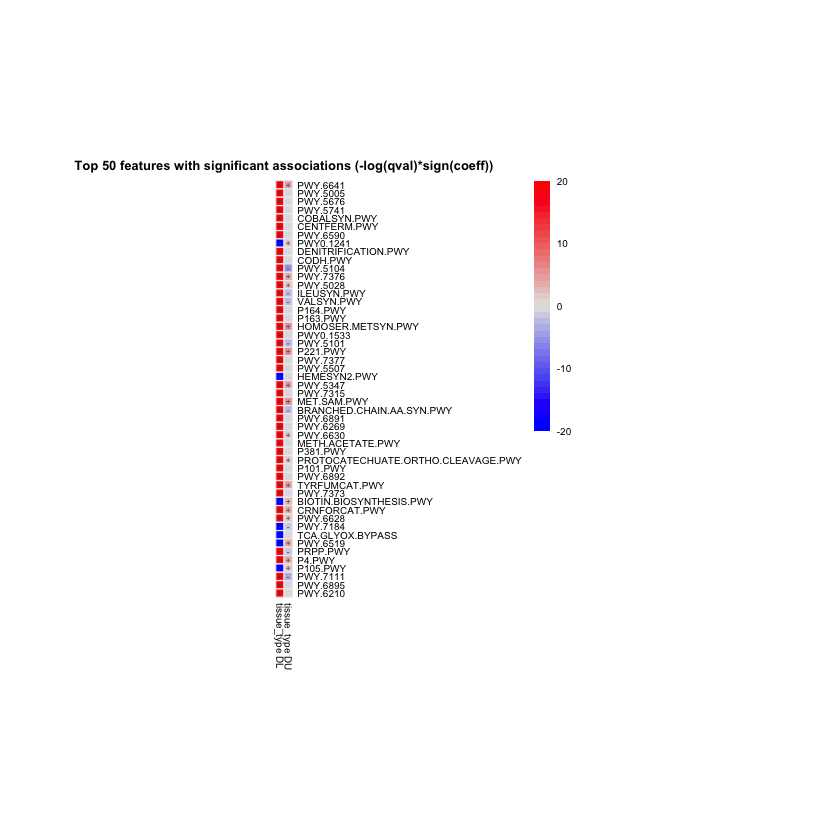

In [23]:
 Maaslin2(
    input_data = otu_table(ps.coral), 
    input_metadata = ps.coral_meta,
     min_abundance = 0.0,
    analysis_method = "LM",
     transform = "LOG",
     cores=2,
     random_effects = "Study",
    normalization = "TMM",
    output = "/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/out_picrust/output_Maslin", 
    correction = "BH",
    fixed_effects = c("tissue_type"),
    reference = c("tissue_type,AH"))

In [24]:
sig =read.csv("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/out_picrust/output_Maslin/significant_results.tsv",
  check.names = FALSE,
                     
                        header = T, sep= "\t")
head(sig)

feature      metadata    value coef      stderr     N    N.not.0 pval        
1 PWY.6641     tissue_type DL    0.5954425 0.03649123 1935 1837    3.701971e-56
2 PWY.5005     tissue_type DL    0.7977848 0.05350122 1935 1064    1.145330e-47
3 PWY.5676     tissue_type DL    0.2921808 0.02021260 1935 1920    4.801880e-45
4 PWY.5741     tissue_type DL    0.4043521 0.02835526 1935 1911    6.143274e-44
5 COBALSYN.PWY tissue_type DL    0.2270835 0.01789129 1935 1932    1.643251e-35
6 CENTFERM.PWY tissue_type DL    0.5673937 0.04583631 1935 1833    6.376088e-34
  qval        
1 2.968981e-53
2 4.592771e-45
3 1.283702e-42
4 1.231727e-41
5 2.635774e-33
6 8.522705e-32

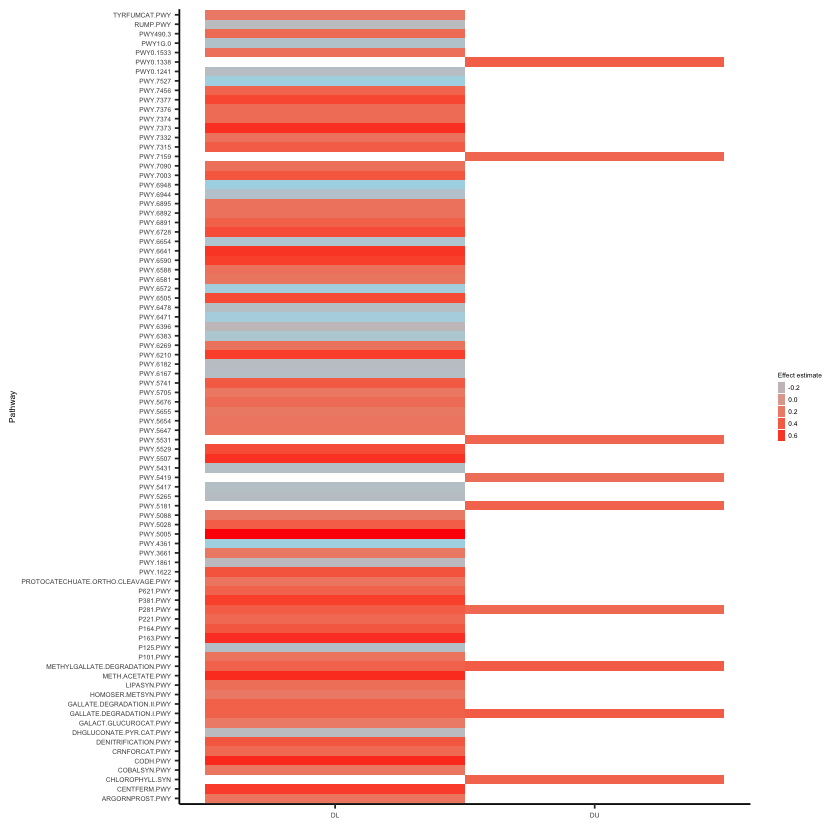

In [56]:
fig_sig = sig %>%
filter(qval <0.0001) %>%
filter(coef > .2 | coef < -.2) %>%
ggplot( 
    aes(x = value, y = feature, fill = coef)) + 
    geom_tile() +

theme_classic() +
scale_fill_continuous(guide = guide_legend(keywidth = 0.30, keyheight = 0.50), low = "lightblue",
  high = "red",

name = "Effect estimate") +
#guides(fill = guide_legend(keywidth = 0.30, keyheight = 0.50)) +
 #scale_fill_manual(ow = "blue", high = "red") +
theme(axis.title.x = element_text(size = 5)) +
theme(axis.title.y = element_text(size = 5)) +
theme(axis.text.y = element_text(size =4)) +
theme(axis.text.x = element_text(size =4)) +
theme(legend.text =element_text(size=4)) +
theme(legend.title = element_text(size=4)) +
#theme(axis.text.x = element_text(angle = 90, hjust = 1, size=7)) +
xlab("") +
ylab("Pathway")
fig_sig



ggsave("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/figs/picrust.png",
    width = 5.5, height = 5, units = "in", dpi=250)